## Pokemon project part2

In this part of the project I have decided to apply a Machine learning mode SVM classification

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [6]:
df = pd.read_csv('Pokemon_Updated.csv')

In [7]:
df.head()


,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,318
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,405
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,525
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,625
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,309


In [ ]:
df.drop(['#','Name'],axis =1, inplace = True)
#Here I ahve decided to drop the Pokemon name 

In [9]:
Pokemon_Data = df
Pokemon_Data.columns

Index(['Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def',
       'Speed', 'Generation', 'Legendary', 'Total'],
      dtype='object')

In [15]:
Pokemon_Data['Type 2'].unique()
# Here we can see we have some empty values for type 2 Pokemon

array(['Poison', nan, 'Flying', 'Dragon', 'Ground', 'Fairy', 'Grass',
       'Fighting', 'Psychic', 'Steel', 'Ice', 'Rock', 'Dark', 'Water',
       'Electric', 'Fire', 'Ghost', 'Bug', 'Normal'], dtype=object)

## Imputation

Imputation is the most sppropriate emthod to deal with these types of empty values. Here I will be using the most frequent values to populate this categorical feature

In [69]:
from sklearn.impute import SimpleImputer

In [12]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp_mean.fit(Pokemon_Data)
imp_trained_Pokemon = imp_mean.transform(Pokemon_Data)

In [13]:
imp_trained_Pokemon = pd.DataFrame(imp_trained_Pokemon)

In [14]:
imp_trained_Pokemon.head(5)

,0,1,2,3,4,5,6,7,8,9,10
0,Grass,Poison,45,49,49,65,65,45,1,False,318
1,Grass,Poison,60,62,63,80,80,60,1,False,405
2,Grass,Poison,80,82,83,100,100,80,1,False,525
3,Grass,Poison,80,100,123,122,120,80,1,False,625
4,Fire,Flying,39,52,43,60,50,65,1,False,309


In [15]:
imp_trained_Pokemon[1].unique()
#Here we can see that we have repalaced the null values in the Type 2 column of the dataframe.

array(['Poison', 'Flying', 'Dragon', 'Ground', 'Fairy', 'Grass',
       'Fighting', 'Psychic', 'Steel', 'Ice', 'Rock', 'Dark', 'Water',
       'Electric', 'Fire', 'Ghost', 'Bug', 'Normal'], dtype=object)

In [17]:
imp_trained_Pokemon.columns = Pokemon_Data.columns
#Adding back the columns

In [18]:
imp_trained_Pokemon

,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
0,Grass,Poison,45,49,49,65,65,45,1,False,318
1,Grass,Poison,60,62,63,80,80,60,1,False,405
2,Grass,Poison,80,82,83,100,100,80,1,False,525
3,Grass,Poison,80,100,123,122,120,80,1,False,625
4,Fire,Flying,39,52,43,60,50,65,1,False,309
...,...,...,...,...,...,...,...,...,...,...,...
795,Rock,Fairy,50,100,150,100,150,50,6,True,600
796,Rock,Fairy,50,160,110,160,110,110,6,True,700
797,Psychic,Ghost,80,110,60,150,130,70,6,True,600
798,Psychic,Dark,80,160,60,170,130,80,6,True,680


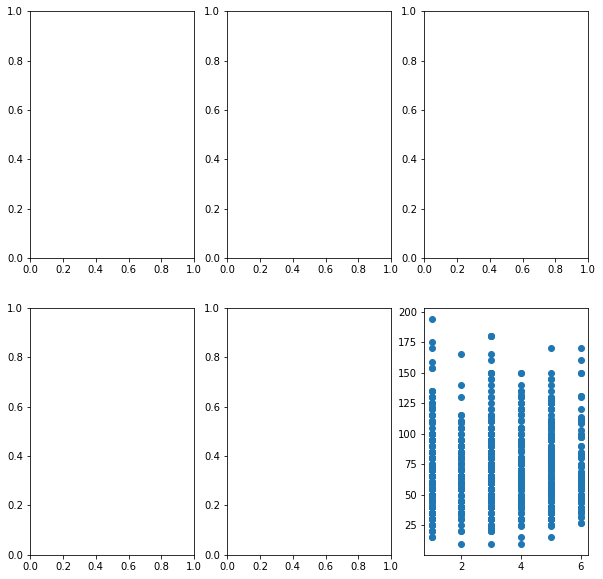

In [86]:
x = imp_trained_Pokemon['Generation']
y = imp_trained_Pokemon['Sp. Atk']
fig,axes = plt.subplots(2,3,figsize=(10,10))
plt.scatter(x,y)



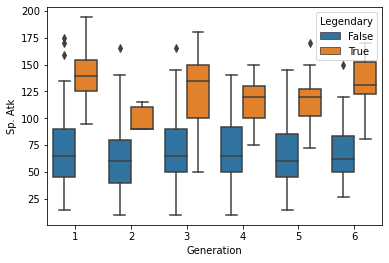

In [87]:
sns.boxplot(x,y,hue=imp_trained_Pokemon['Legendary'])


Create a collumn called target this will be what were trying to predict. The target column must be nummerical and 
the numbers are represneted by the feature names. e.g. 0 is Standard and 1 is legendary for the series legendary from the 
pokemon

In [28]:
P_SVM = df[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def',
       'Speed', 'Generation', 'Legendary']]

In [29]:
P_SVM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   HP          800 non-null    int64
 1   Attack      800 non-null    int64
 2   Defense     800 non-null    int64
 3   Sp. Atk     800 non-null    int64
 4   Sp. Def     800 non-null    int64
 5   Speed       800 non-null    int64
 6   Generation  800 non-null    int64
 7   Legendary   800 non-null    bool 
dtypes: bool(1), int64(7)
memory usage: 44.7 KB


In [30]:
P_SVM['Target'] = Leg_SVM['Legendary'].replace({False:0,True:1})

C:\Users\dwell\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [31]:
P_SVM['Target_Names'] = Leg_SVM['Target'].replace({0:'Standard',1:'Legendary'})


C:\Users\dwell\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [33]:
P_SVM0 = Leg_SVM[Leg_SVM['Target']==0]
P_SVM1 = Leg_SVM[Leg_SVM['Target']==1]

In [34]:
P_SVM0.head()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Target,Target_Names
0,45,49,49,65,65,45,1,False,0,Standard
1,60,62,63,80,80,60,1,False,0,Standard
2,80,82,83,100,100,80,1,False,0,Standard
3,80,100,123,122,120,80,1,False,0,Standard
4,39,52,43,60,50,65,1,False,0,Standard


In [35]:
P_SVM0['Target_Names'].unique()
# Here I am checking that we have filtered the data correctly

array(['Standard'], dtype=object)

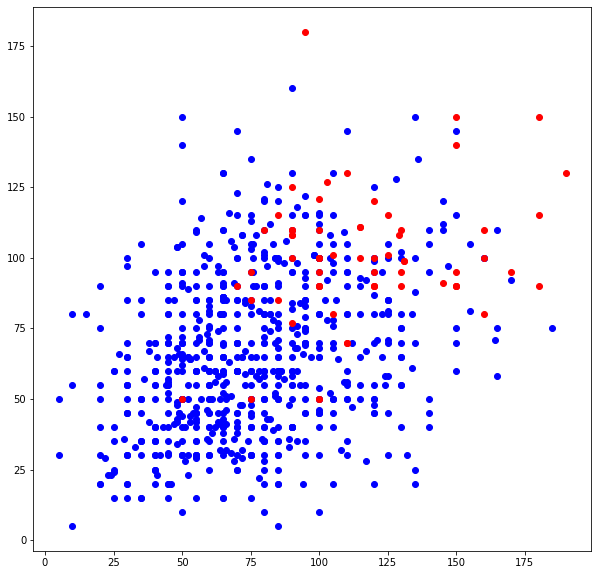

In [36]:
plt.subplots(figsize=(10,10))
plt.scatter(P_SVM0['Attack'],P_SVM0['Speed'], c= 'blue')
plt.scatter(P_SVM1['Attack'],P_SVM1['Speed'], c= 'red')

In [1]:
from sklearn.model_selection import train_test_split

In [41]:
#Setting X to the feature we will use to train and test 
X = P_SVM.drop(['Target','Target_Names'],axis=1)

In [42]:
X

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
0,45,49,49,65,65,45,1
1,60,62,63,80,80,60,1
2,80,82,83,100,100,80,1
3,80,100,123,122,120,80,1
4,39,52,43,60,50,65,1
...,...,...,...,...,...,...,...
795,50,100,150,100,150,50,6
796,50,160,110,160,110,110,6
797,80,110,60,150,130,70,6
798,80,160,60,170,130,80,6


In [45]:
y = P_SVM['Target']

Here we can see that the target class is unbalanced

In [71]:
P_SVM['Target_Names'].value_counts()

Standard     735
Legendary     65
Name: Target_Names, dtype: int64

Here we have assigned the train, test, split model to the the X and y to create the retrospective train and test data sets.

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [73]:
from sklearn.svm import SVC
model = SVC(class_weight='balanced')
# Here I have imported the clasification model and changed the class weight to balanced

In [74]:
model.fit(X_train,y_train)
#Training the model to the datasets

SVC(C=1.0, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [75]:
model.score(X_test,y_test)

0.9125